# SVM

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=250
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Forestfires Data

In [155]:
forest=pd.read_csv("forestfires.csv")
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...     ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0         0       0       0       0       0       0         0         0   
1         0       0       0       0       1       0         0         0   
2         0       1       0       0       0       0         0         0   
3         0       0       0       0       0       0         0         0   
4         0       0       1       0       0       0         0         0   
..      ...     ...     ...     ...     ...     ...       ...       ...   
512       0       0       1       0       0       0         0         1   
513       0       0       1       0       0       0         0         1   
514       0       0       1       0       0       0         0         1   
515       0       1       0       0       0       0         0         1   
516       0       0       0       0       1       0         0         0   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
0           0         0         0         small  
1           0         1         0         small  
2           0         1         0         small  
3           0         0         0         small  
4           0         0         0         small  
..        ...       ...       ...           ...  
512         0         0         0         large  
513         0         0         0         large  
514         0         0         0         large  
515         0         0         0         small  
516         1         0         0         small  

[517 rows x 31 columns]

# EDA

In [156]:
forest=forest.iloc[:,2:]
forest

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   

     daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  \
0         0       0       0       0       0         0         0         0   
1         0       0       0       1       0         0         0         0   
2         1       0       0       0       0         0         0         0   
3         0       0       0       0       0         0         0         0   
4         0       1       0       0       0         0         0         0   
..      ...     ...     ...     ...     ...       ...       ...       ...   
512       0       1       0       0       0         0         1         0   
513       0       1       0       0       0         0         1         0   
514       0       1       0       0       0         0         1         0   
515       1       0       0       0       0         0         1         0   
516       0       0       0       1       0         0         0         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep size_category  
0           0         0         small  
1           1         0         small  
2           1         0         small  
3           0         0         small  
4           0         0         small  
..        ...       ...           ...  
512         0         0         large  
513         0         0         large  
514         0         0         large  
515         0         0         small  
516         0         0         small  

[517 rows x 29 columns]

In [157]:
forest.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri      daymon  \
count  517.000000  517.000000   517.000000  517.000000  517.000000   
mean     4.017602    0.021663    12.847292    0.164410    0.143133   
std      1.791653    0.295959    63.655818    0.371006    0.350548   
min      0.400000    0.000000     0.000000    0.000000    0.000000   
25%      2.700000    0.000000     0.000000    0.000000    0.000000   
50%      4.000000    0.000000     0.520000    0.000000    0.000000   
75%      4.900000    0.000000     6.570000    0.000000    0.000000   
max      9.400000    6.400000  1090.840000    1.000000    1.000000   

           daysat      daysun      daythu      daytue      daywed    monthapr  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.162476    0.183752    0.117988    0.123791    0.104449    0.017408   
std      0.369244    0.387657    0.322907    0.329662    0.306138    0.130913   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthaug    monthdec    monthfeb    monthjan    monthjul    monthjun  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.355899    0.017408    0.038685    0.003868    0.061896    0.032882   
std      0.479249    0.130913    0.193029    0.062137    0.241199    0.178500   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthmar    monthmay    monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  517.000000  517.000000  
mean     0.104449    0.003868    0.001934    0.029014    0.332689  
std      0.306138    0.062137    0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [158]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [159]:
pd.set_option("display.max_columns", 31)
forest.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  daymon  daysat  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0       0       1   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0       0       0   

   daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  \
0       0       0       0       0         0         0         0         0   
1       0       0       1       0         0         0         0         0   
2       0       0       0       0         0         0         0         0   
3       0       0       0       0         0         0         0         0   
4       1       0       0       0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep size_category  
0         0         small  
1         0         small  
2         0         small  
3         0         small  
4         0         small

# Data Visualisation

In [160]:
y_count = forest.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


size_category  counts
0         small     378
1         large     139

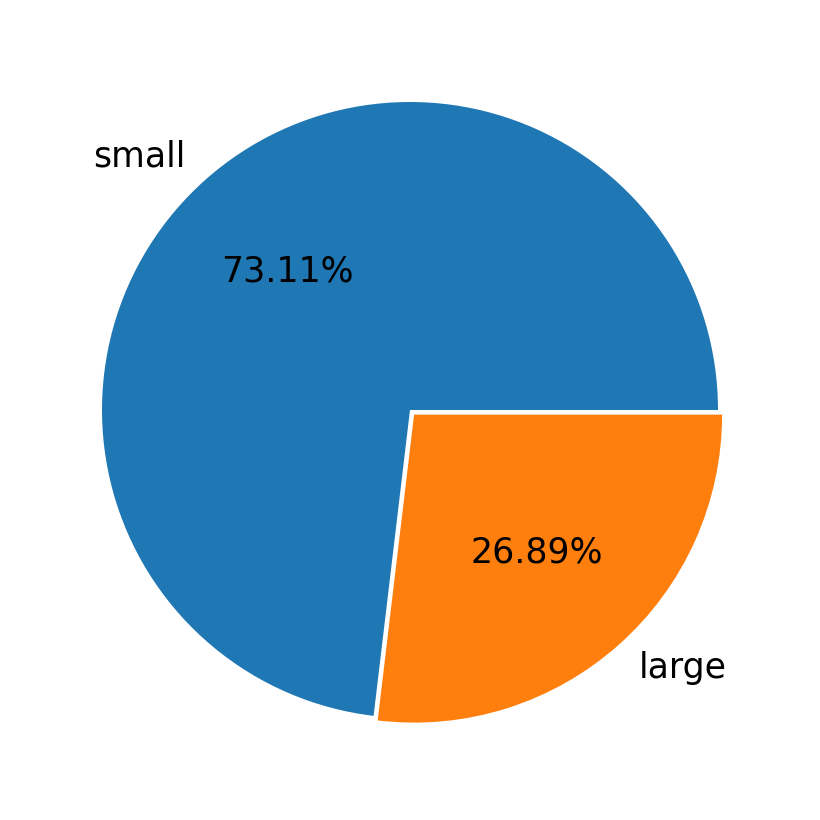

In [151]:
plt.figure(figsize=(4,4))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [140]:
month_df = forest.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

size_category month  count
11         small   aug    141
21         small   sep    121
9          large   sep     51
1          large   aug     43
17         small   mar     42
15         small   jul     23
16         small   jun     14
13         small   feb     14
6          large   mar     12
20         small   oct     11

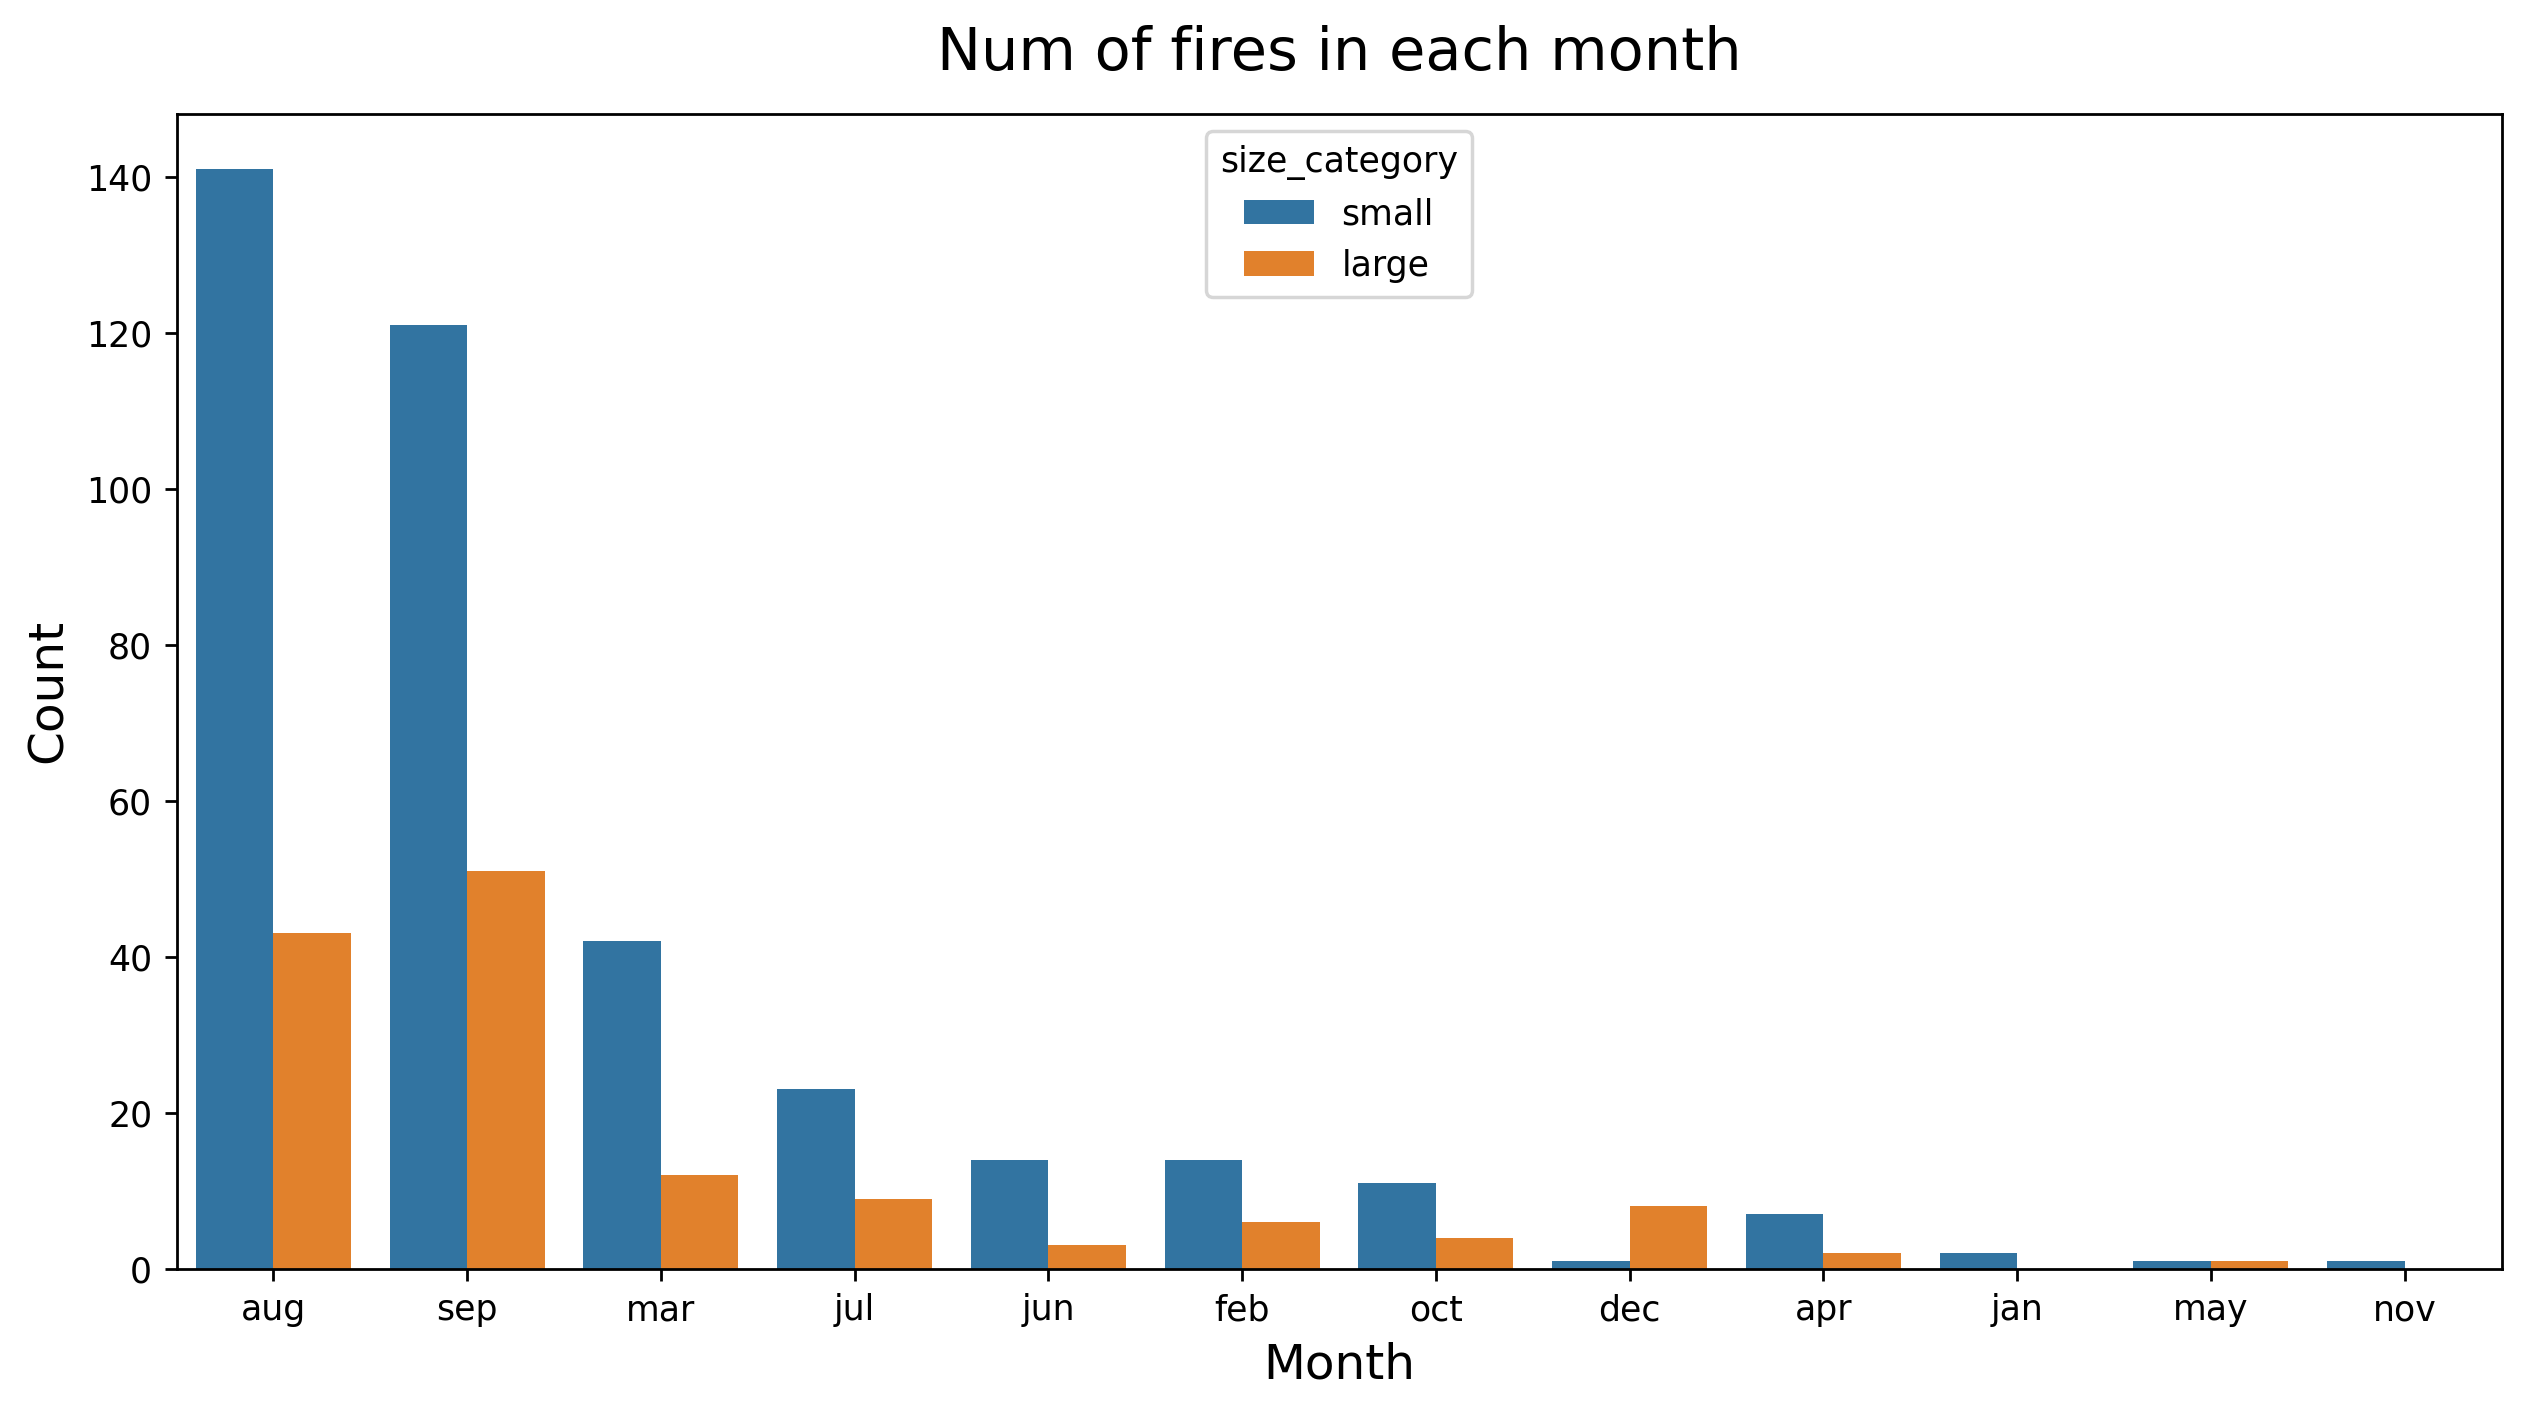

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

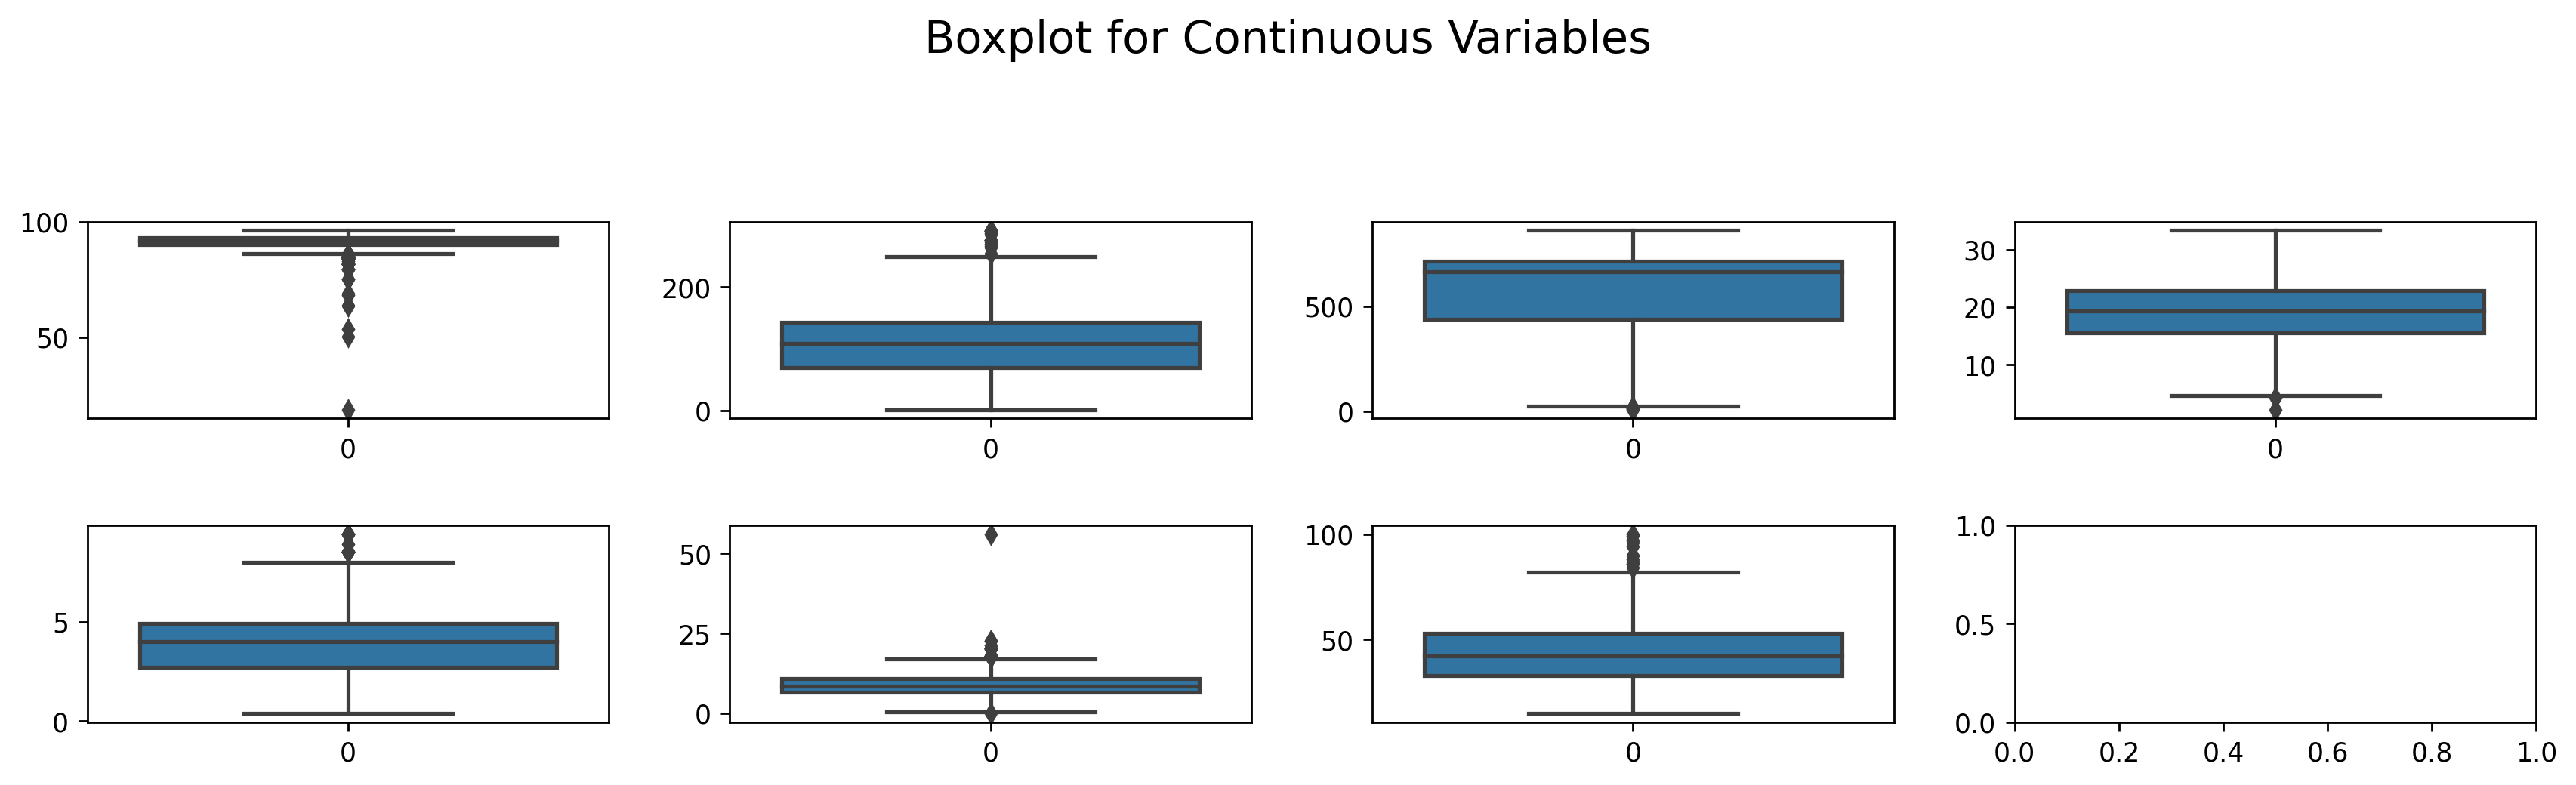

In [146]:
fig, ax=plt.subplots(2,4, figsize=(14,4), sharex= False, sharey = False)
sns.boxplot(forest.FFMC, ax=ax[0,0])
sns.boxplot(forest.DMC, ax=ax[0,1])
sns.boxplot(forest.DC, ax=ax[0,2])
sns.boxplot(forest.temp, ax=ax[0,3])
sns.boxplot(forest.wind, ax=ax[1,0])
sns.boxplot(forest.ISI, ax=ax[1,1])
sns.boxplot(forest.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [147]:
df = forest.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area size_category
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0         small
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0         small
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0         small
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0         small
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0         small

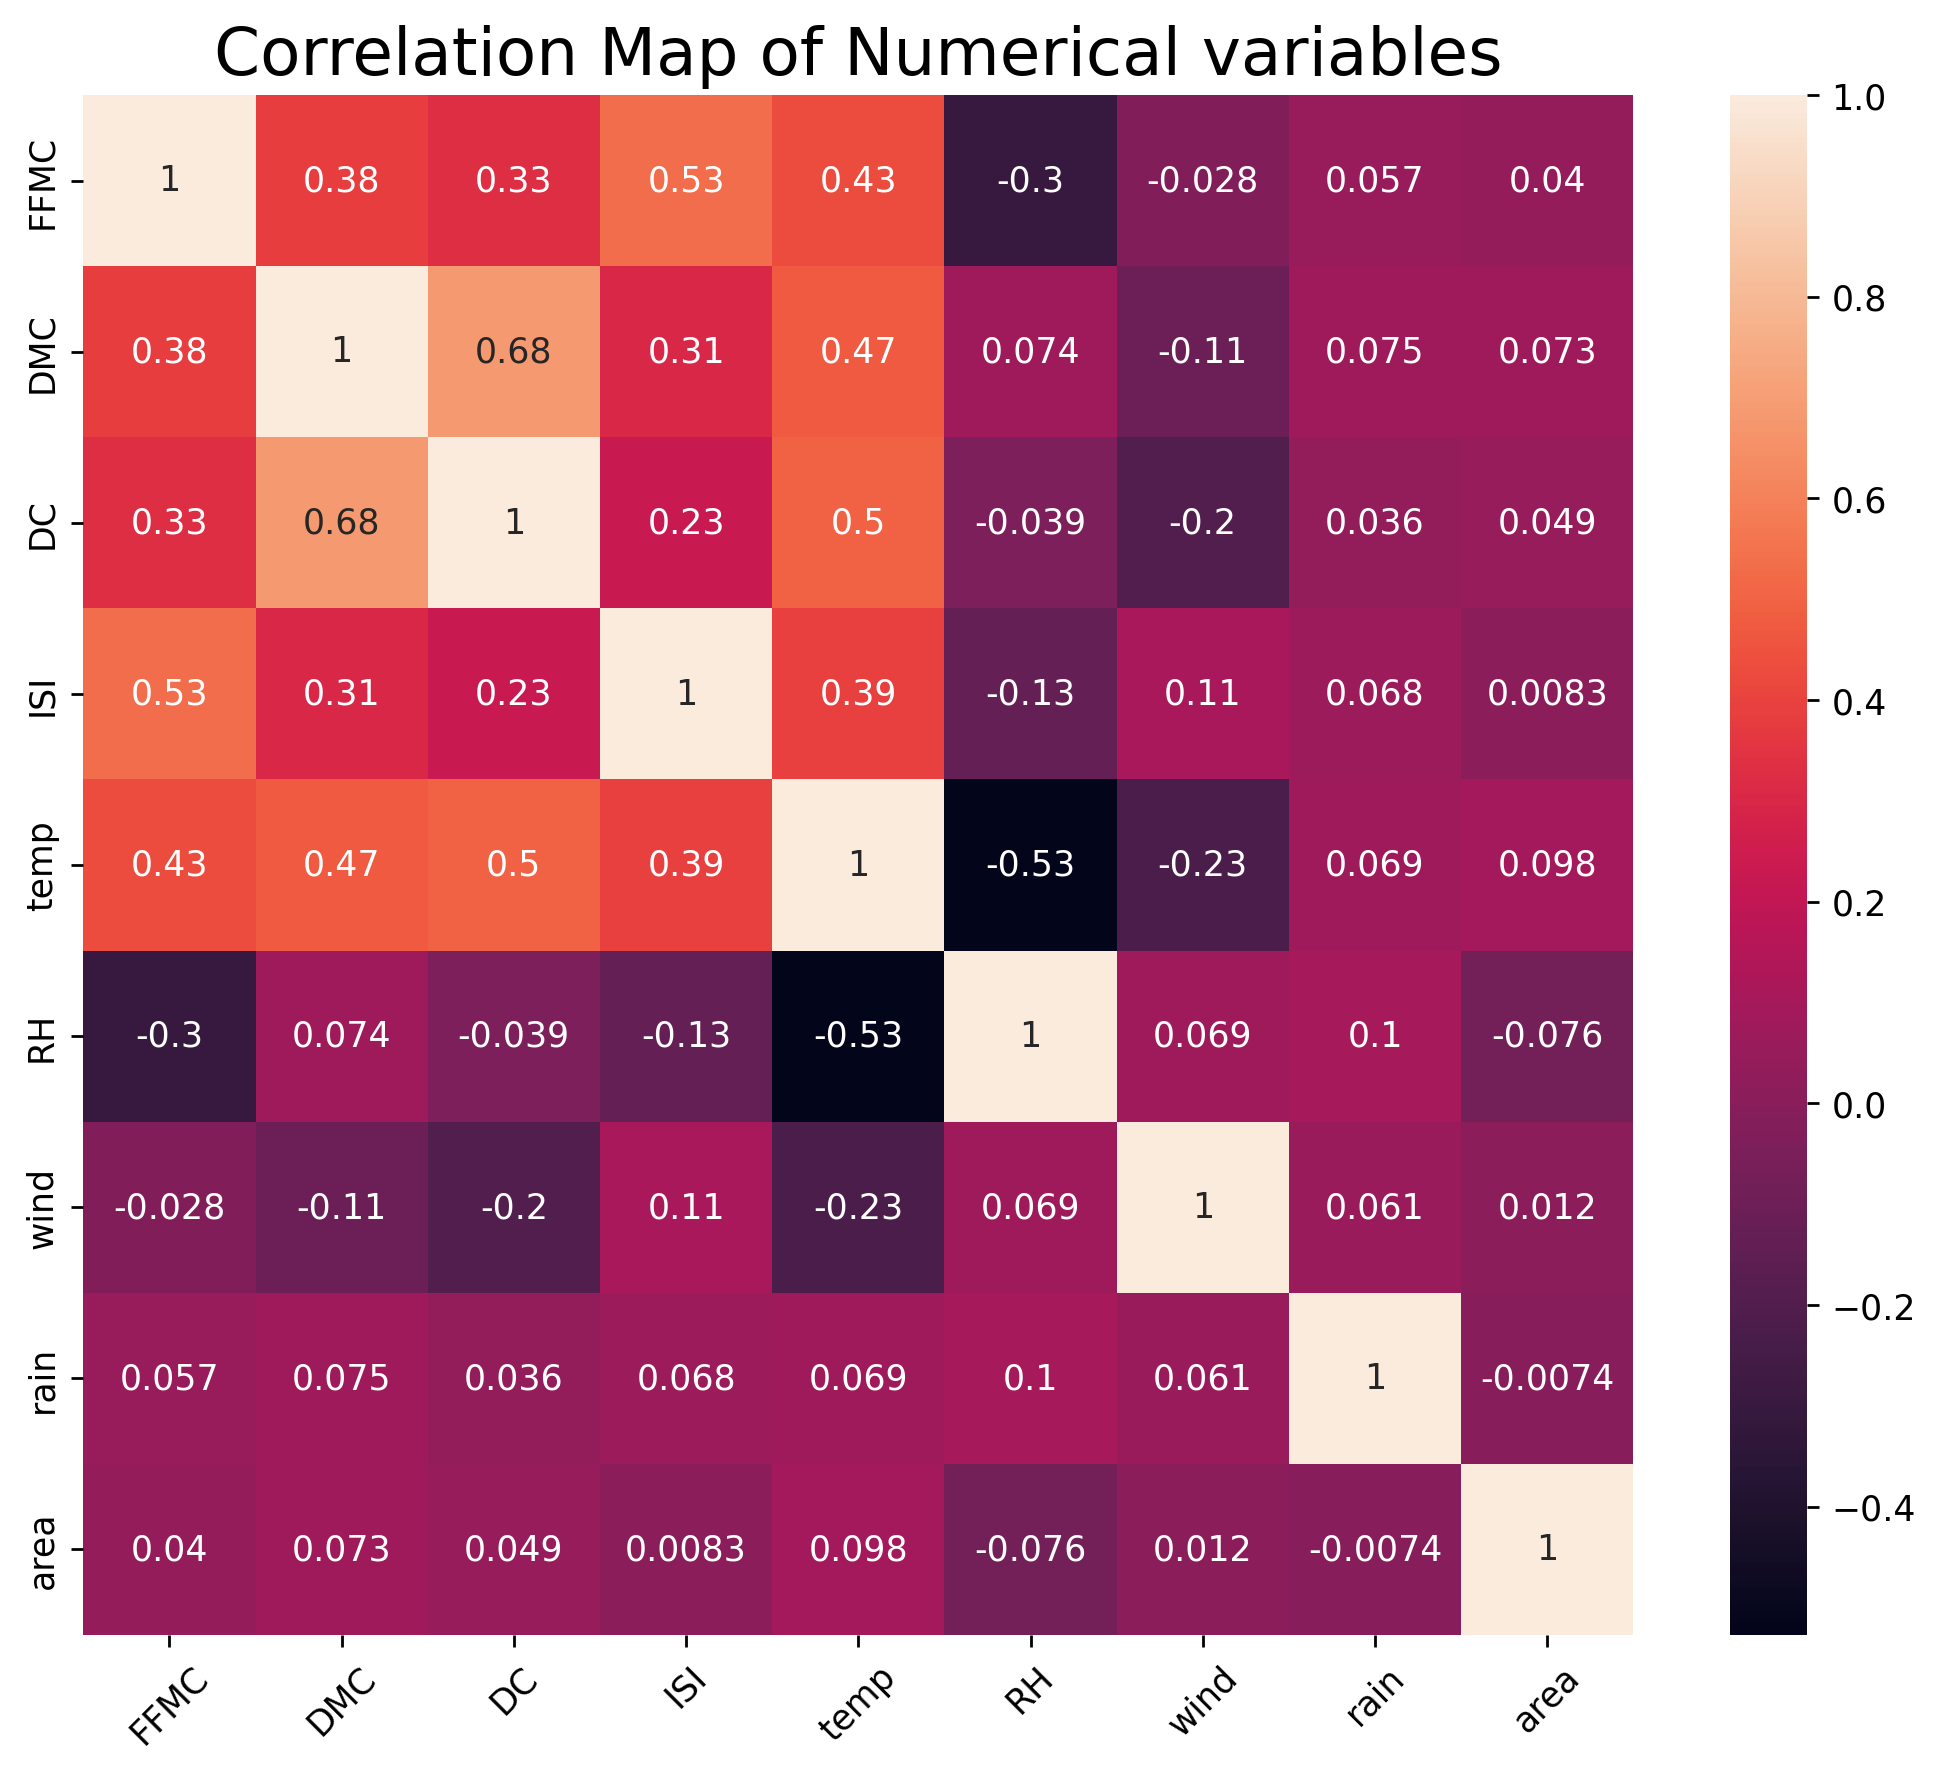

In [148]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19);

In [161]:
lb=LabelEncoder()
forest["size_category"]= lb.fit_transform(forest["size_category"])
forest["size_category"].unique()

array([1, 0])

In [162]:
forest

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   

     daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  \
0         0       0       0       0       0         0         0         0   
1         0       0       0       1       0         0         0         0   
2         1       0       0       0       0         0         0         0   
3         0       0       0       0       0         0         0         0   
4         0       1       0       0       0         0         0         0   
..      ...     ...     ...     ...     ...       ...       ...       ...   
512       0       1       0       0       0         0         1         0   
513       0       1       0       0       0         0         1         0   
514       0       1       0       0       0         0         1         0   
515       1       0       0       0       0         0         1         0   
516       0       0       0       1       0         0         0         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

In [163]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [164]:
sc=StandardScaler()

X=sc.fit_transform(x)

# Splitting the data

In [165]:
xtrain,xtest,ytrain,ytest= train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
xtrain

array([[ 3.18294191e-01, -7.92745039e-02,  8.48013607e-01, ...,
        -4.40225453e-02, -1.72859706e-01,  1.41626761e+00],
       [ 1.00696708e-01, -2.59005499e-01,  7.92732923e-01, ...,
        -4.40225453e-02, -1.72859706e-01,  1.41626761e+00],
       [-8.06345284e-02,  4.32285466e-04, -4.25299670e-02, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       ...,
       [ 2.63894820e-01,  6.52152504e-01,  4.44908473e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 2.81642133e-02, -4.09041809e-01, -6.91371865e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 7.53489157e-01, -4.02025483e-02,  4.00119014e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01]])

In [167]:
xtest

array([[-1.00542383, -1.29519376, -1.75179258, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.98921976,  1.0975728 ,  0.4973646 , ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.26389482,  1.50235826,  0.50301372, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [ 0.10069671,  1.12883036, -0.44482808, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-0.31636514,  2.37913294,  1.00053987, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.08256358, -0.11990934,  0.3666278 , ..., -0.04402255,
        -0.17285971, -0.70608125]])

In [168]:
ytrain

311    0
368    0
23     1
271    0
299    1
      ..
71     1
106    1
270    1
435    1
102    1
Name: size_category, Length: 361, dtype: int32

In [169]:
ytest

304    1
501    1
441    1
153    1
503    1
      ..
192    0
66     1
286    1
422    0
94     1
Name: size_category, Length: 156, dtype: int32

# Model Building

In [170]:
svc= SVC()

svc.fit(xtrain, ytrain)
ypred=svc.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [171]:
print(svc.score(xtrain, ytrain))


0.7839335180055401


In [172]:
print(svc.score(xtest, ytest))

0.7692307692307693


# Salary Data

In [179]:
salary1=pd.read_csv('SalaryData_Train(1).csv')
salary2=pd.read_csv('SalaryData_Test(1).csv')

In [180]:
salary1

age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
11935   38            Private   Some-college           10   
11936   48            Private        HS-grad            9   
11937   33            Private        HS-grad            9   
11938   30            Private        HS-grad            9   
11939   25          State-gov      Bachelors           13   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
11935        Never-married        Adm-clerical       Own-child   White   
11936   Married-civ-spouse       Other-service         Husband   White   
11937   Married-civ-spouse     Exec-managerial         Husband   White   
11938        Never-married       Other-service   Not-in-family   White   
11939        Never-married      Prof-specialty   Not-in-family   White   

           sex  capitalgain  capitalloss  hoursperweek          native  Salary  
0         Male         2174            0            40   United-States   <=50K  
1         Male            0            0            13   United-States   <=50K  
2         Male            0            0            40   United-States   <=50K  
3         Male            0            0            40   United-States   <=50K  
4       Female            0            0            40            Cuba   <=50K  
...        ...          ...          ...           ...             ...     ...  
11935   Female            0            0            40   United-States   <=50K  
11936     Male            0            0            40          Mexico    >50K  
11937     Male         4386            0            60   United-States   <=50K  
11938     Male            0            0            40         Ireland   <=50K  
11939   Female            0            0            50           Unite     NaN  

[11940 rows x 14 columns]

In [107]:
salary2

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

# EDA 

In [108]:
salary1.describe()

age   educationno   capitalgain  capitalloss  hoursperweek
count  11940.000000  11940.000000  11940.000000  11940.00000  11940.000000
mean      38.354271     10.123367   1084.816164     90.18928     41.023786
std       13.087435      2.528989   7416.587947    405.61282     11.846462
min       17.000000      1.000000      0.000000      0.00000      1.000000
25%       28.000000      9.000000      0.000000      0.00000     40.000000
50%       37.000000     10.000000      0.000000      0.00000     40.000000
75%       47.000000     13.000000      0.000000      0.00000     45.000000
max       90.000000     16.000000  99999.000000   3770.00000     99.000000

In [109]:
salary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            11940 non-null  int64 
 1   workclass      11940 non-null  object
 2   education      11940 non-null  object
 3   educationno    11940 non-null  int64 
 4   maritalstatus  11940 non-null  object
 5   occupation     11940 non-null  object
 6   relationship   11940 non-null  object
 7   race           11940 non-null  object
 8   sex            11940 non-null  object
 9   capitalgain    11940 non-null  int64 
 10  capitalloss    11940 non-null  int64 
 11  hoursperweek   11940 non-null  int64 
 12  native         11940 non-null  object
 13  Salary         11939 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [188]:
salary1.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

# Data visualization

In [173]:
sns.pairplot(salary1)
plt.show()

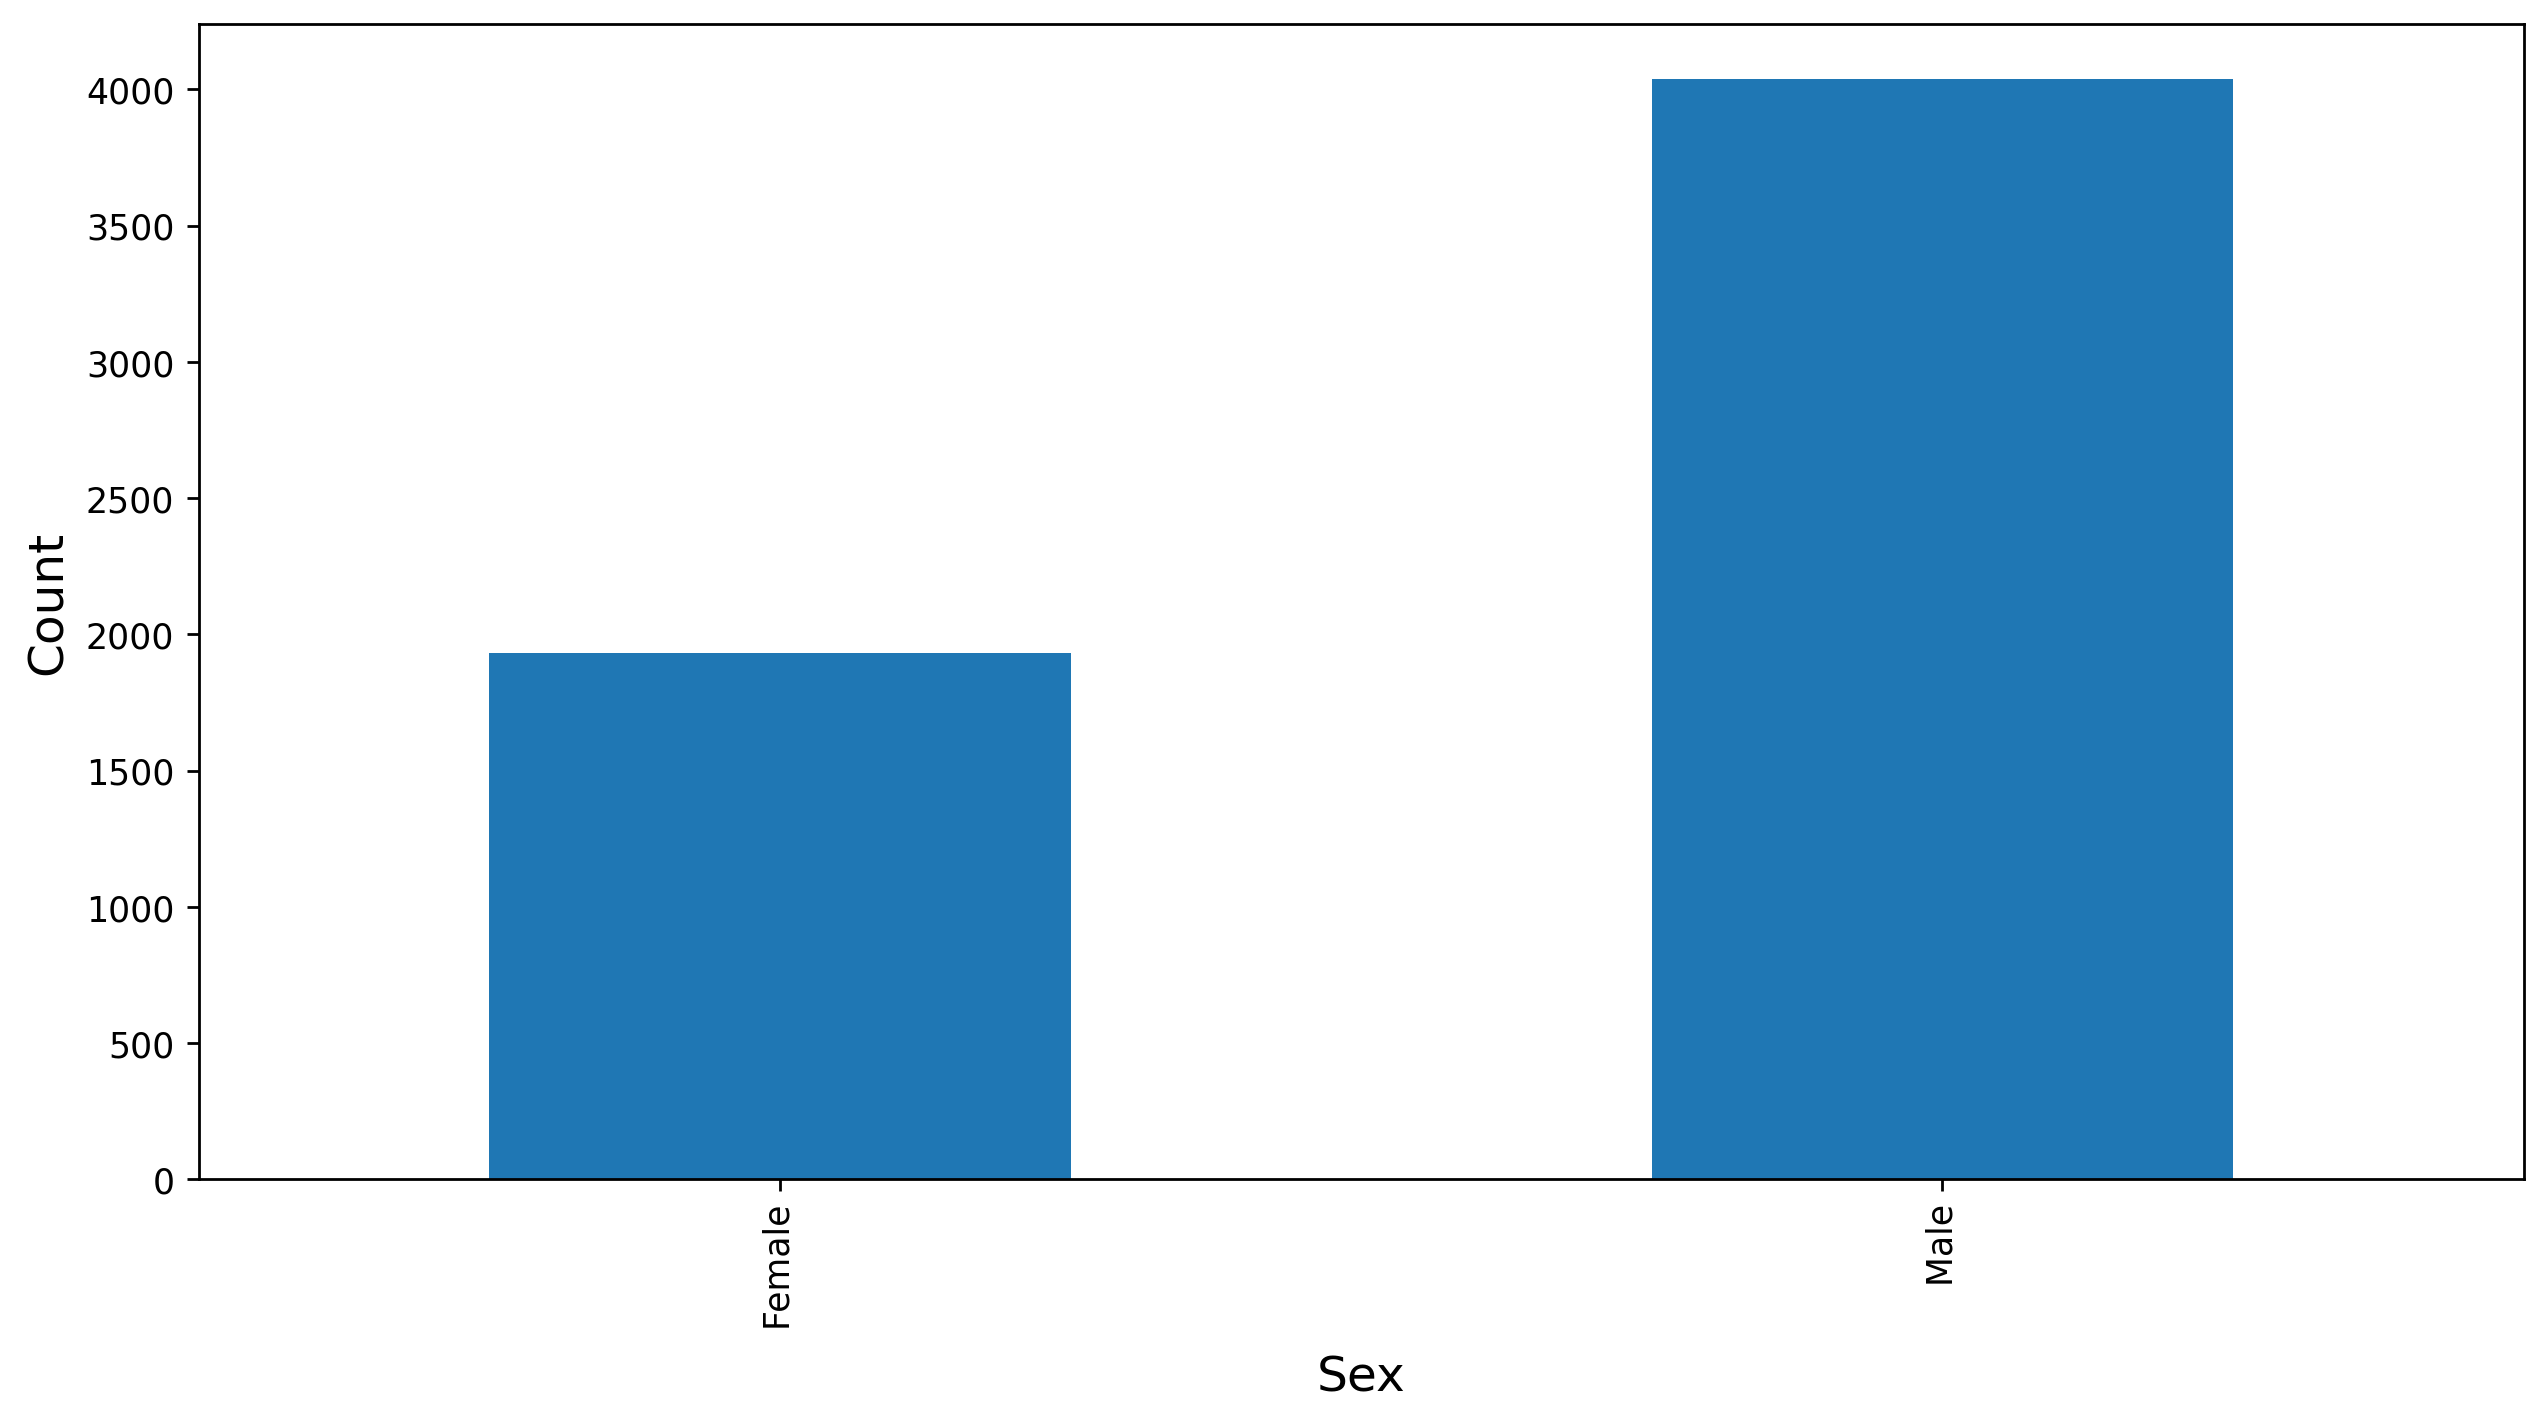

In [181]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(salary1['Salary'],salary1['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

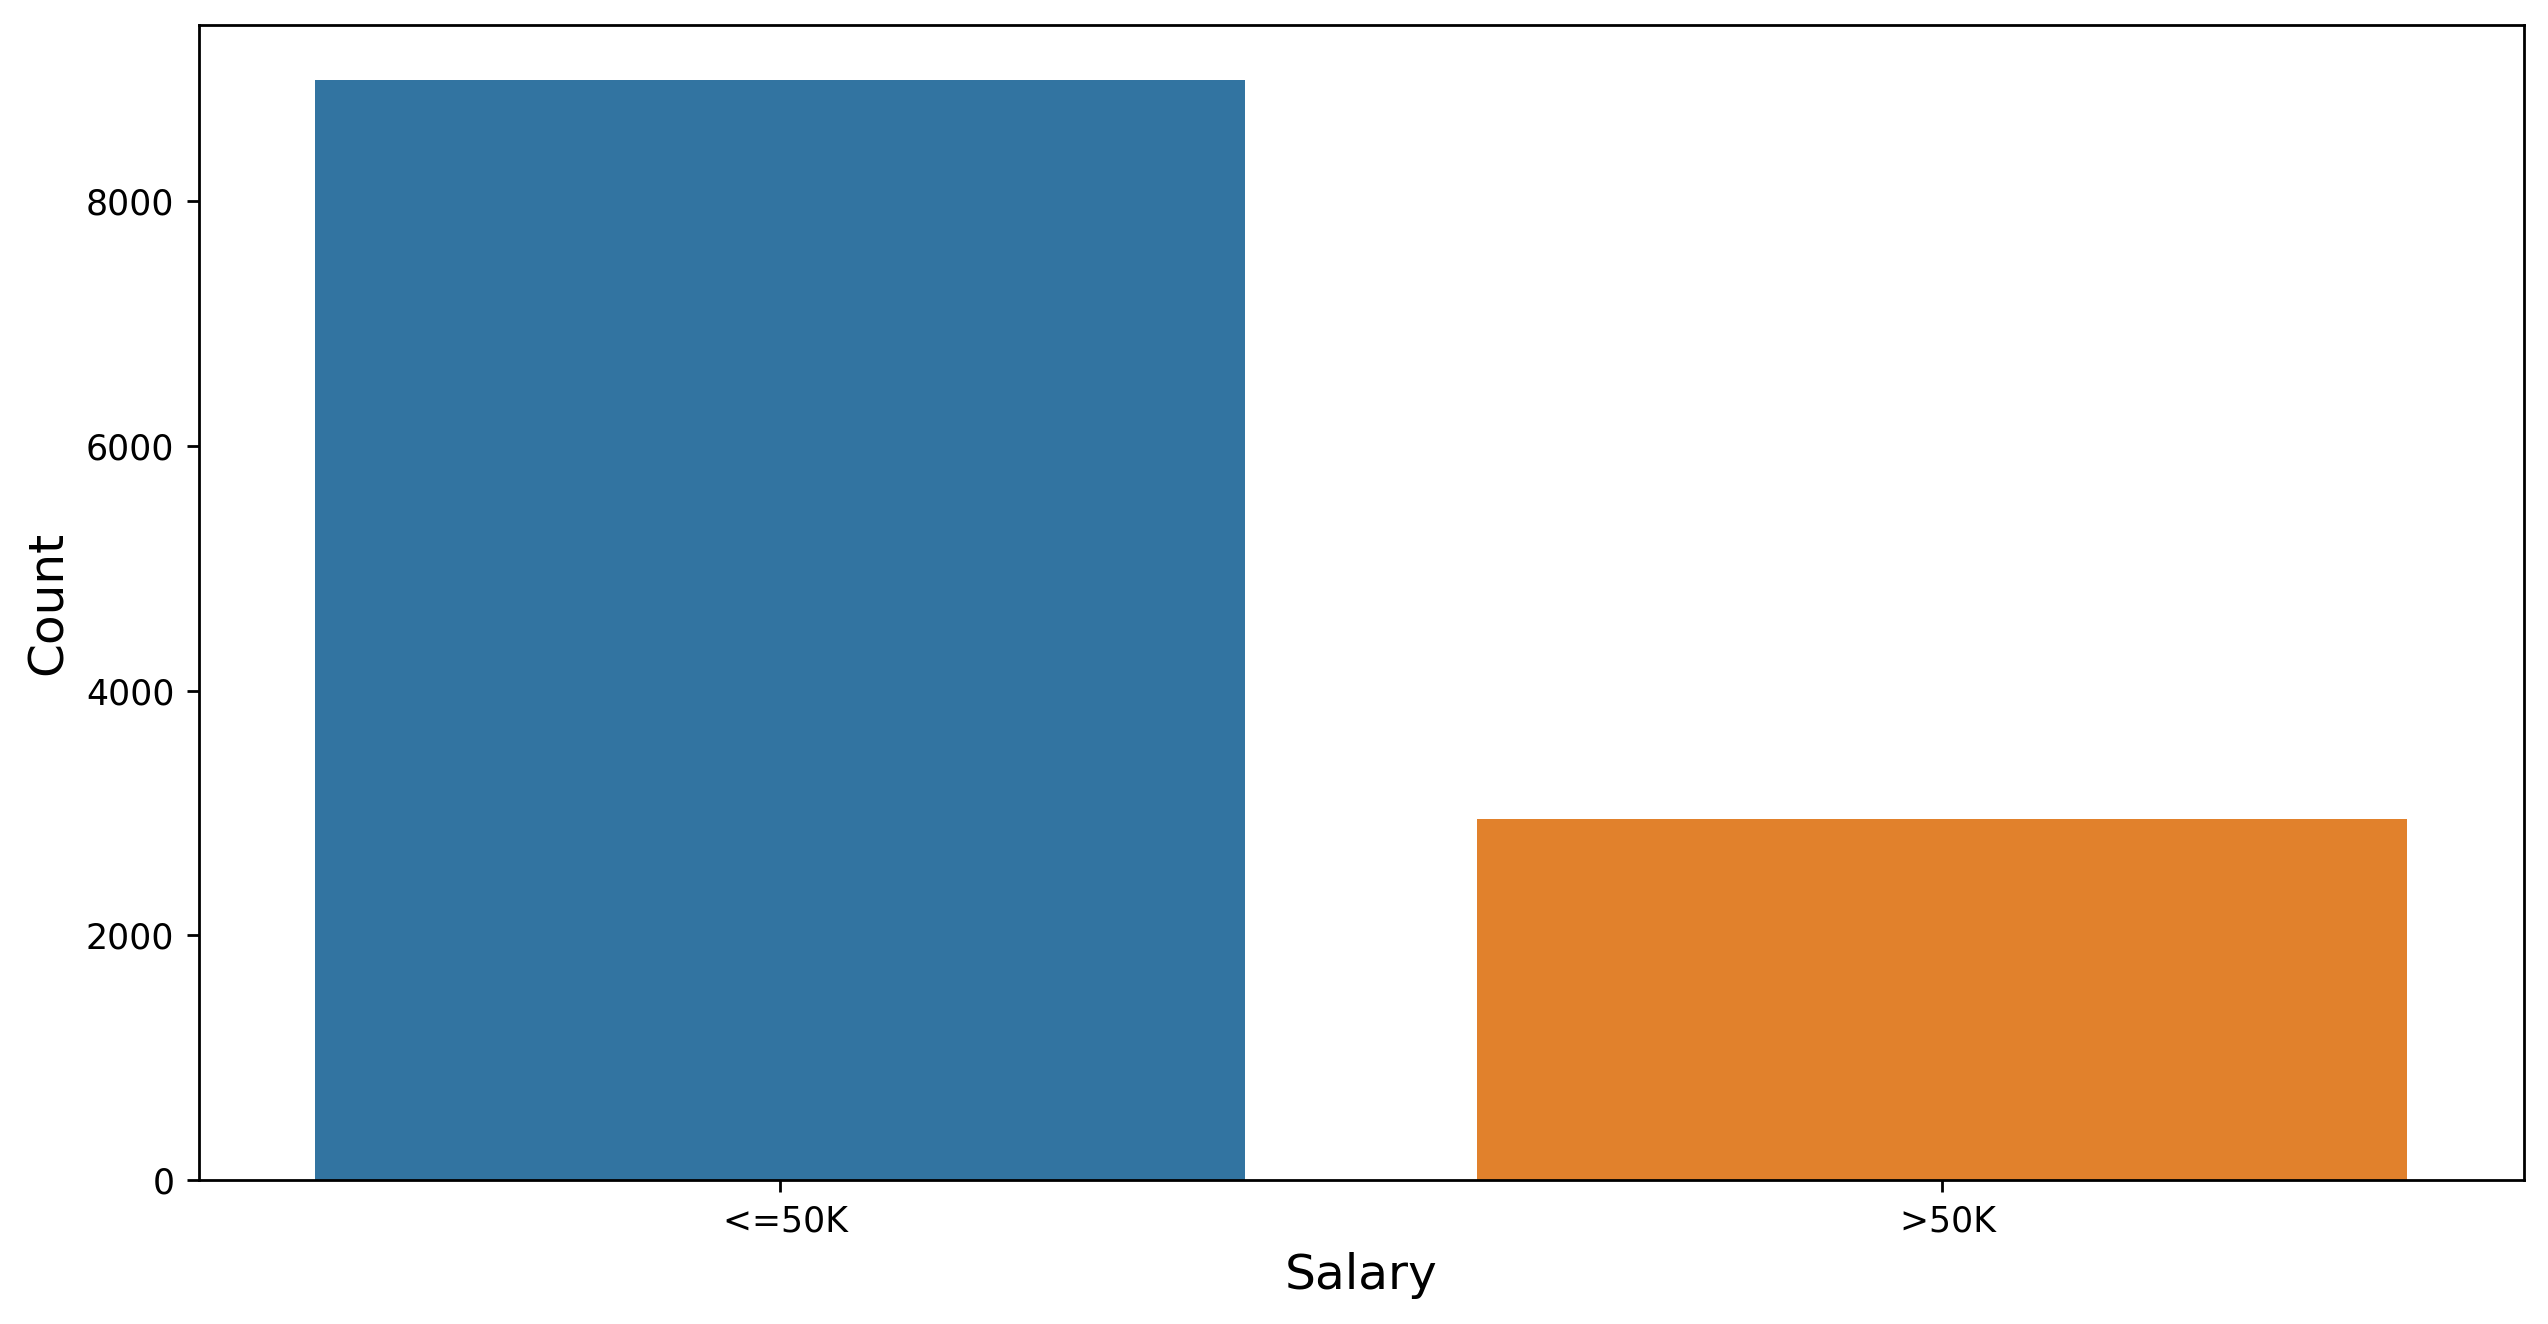

In [182]:
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(x='Salary', data= salary1)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

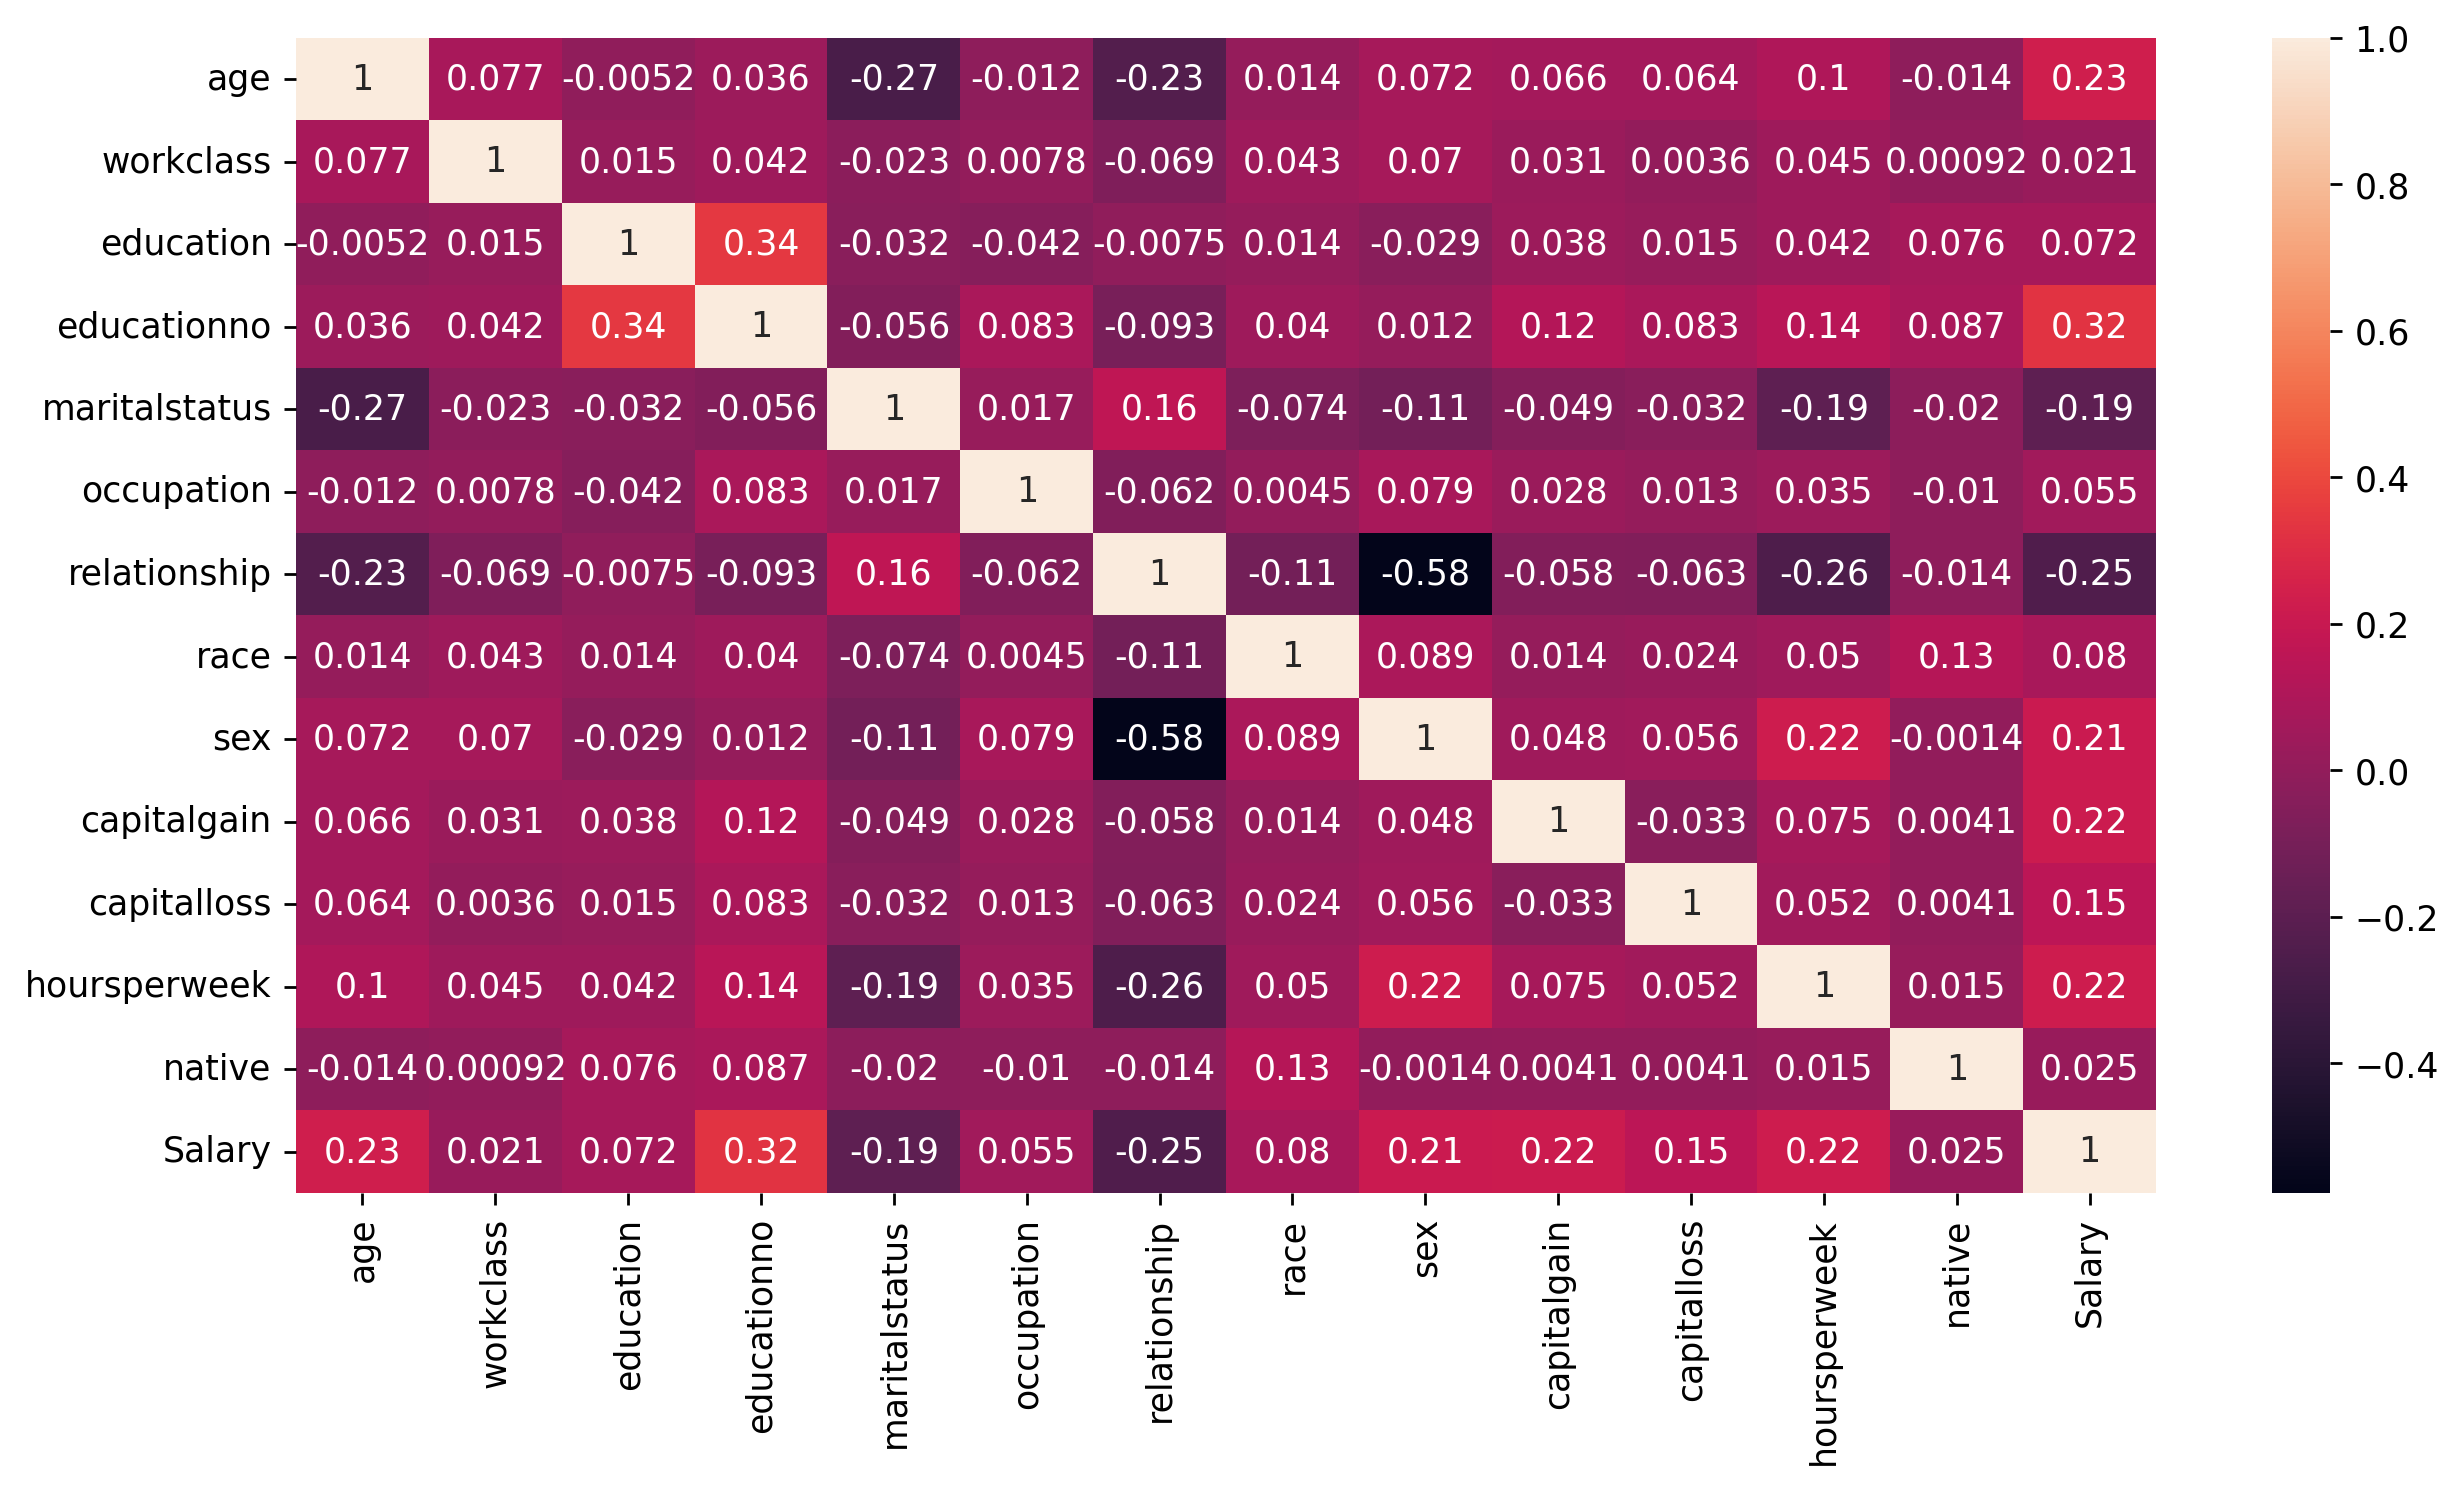

In [206]:
corr = salary1.corr()
sns.heatmap(corr, annot=True)
plt.show()

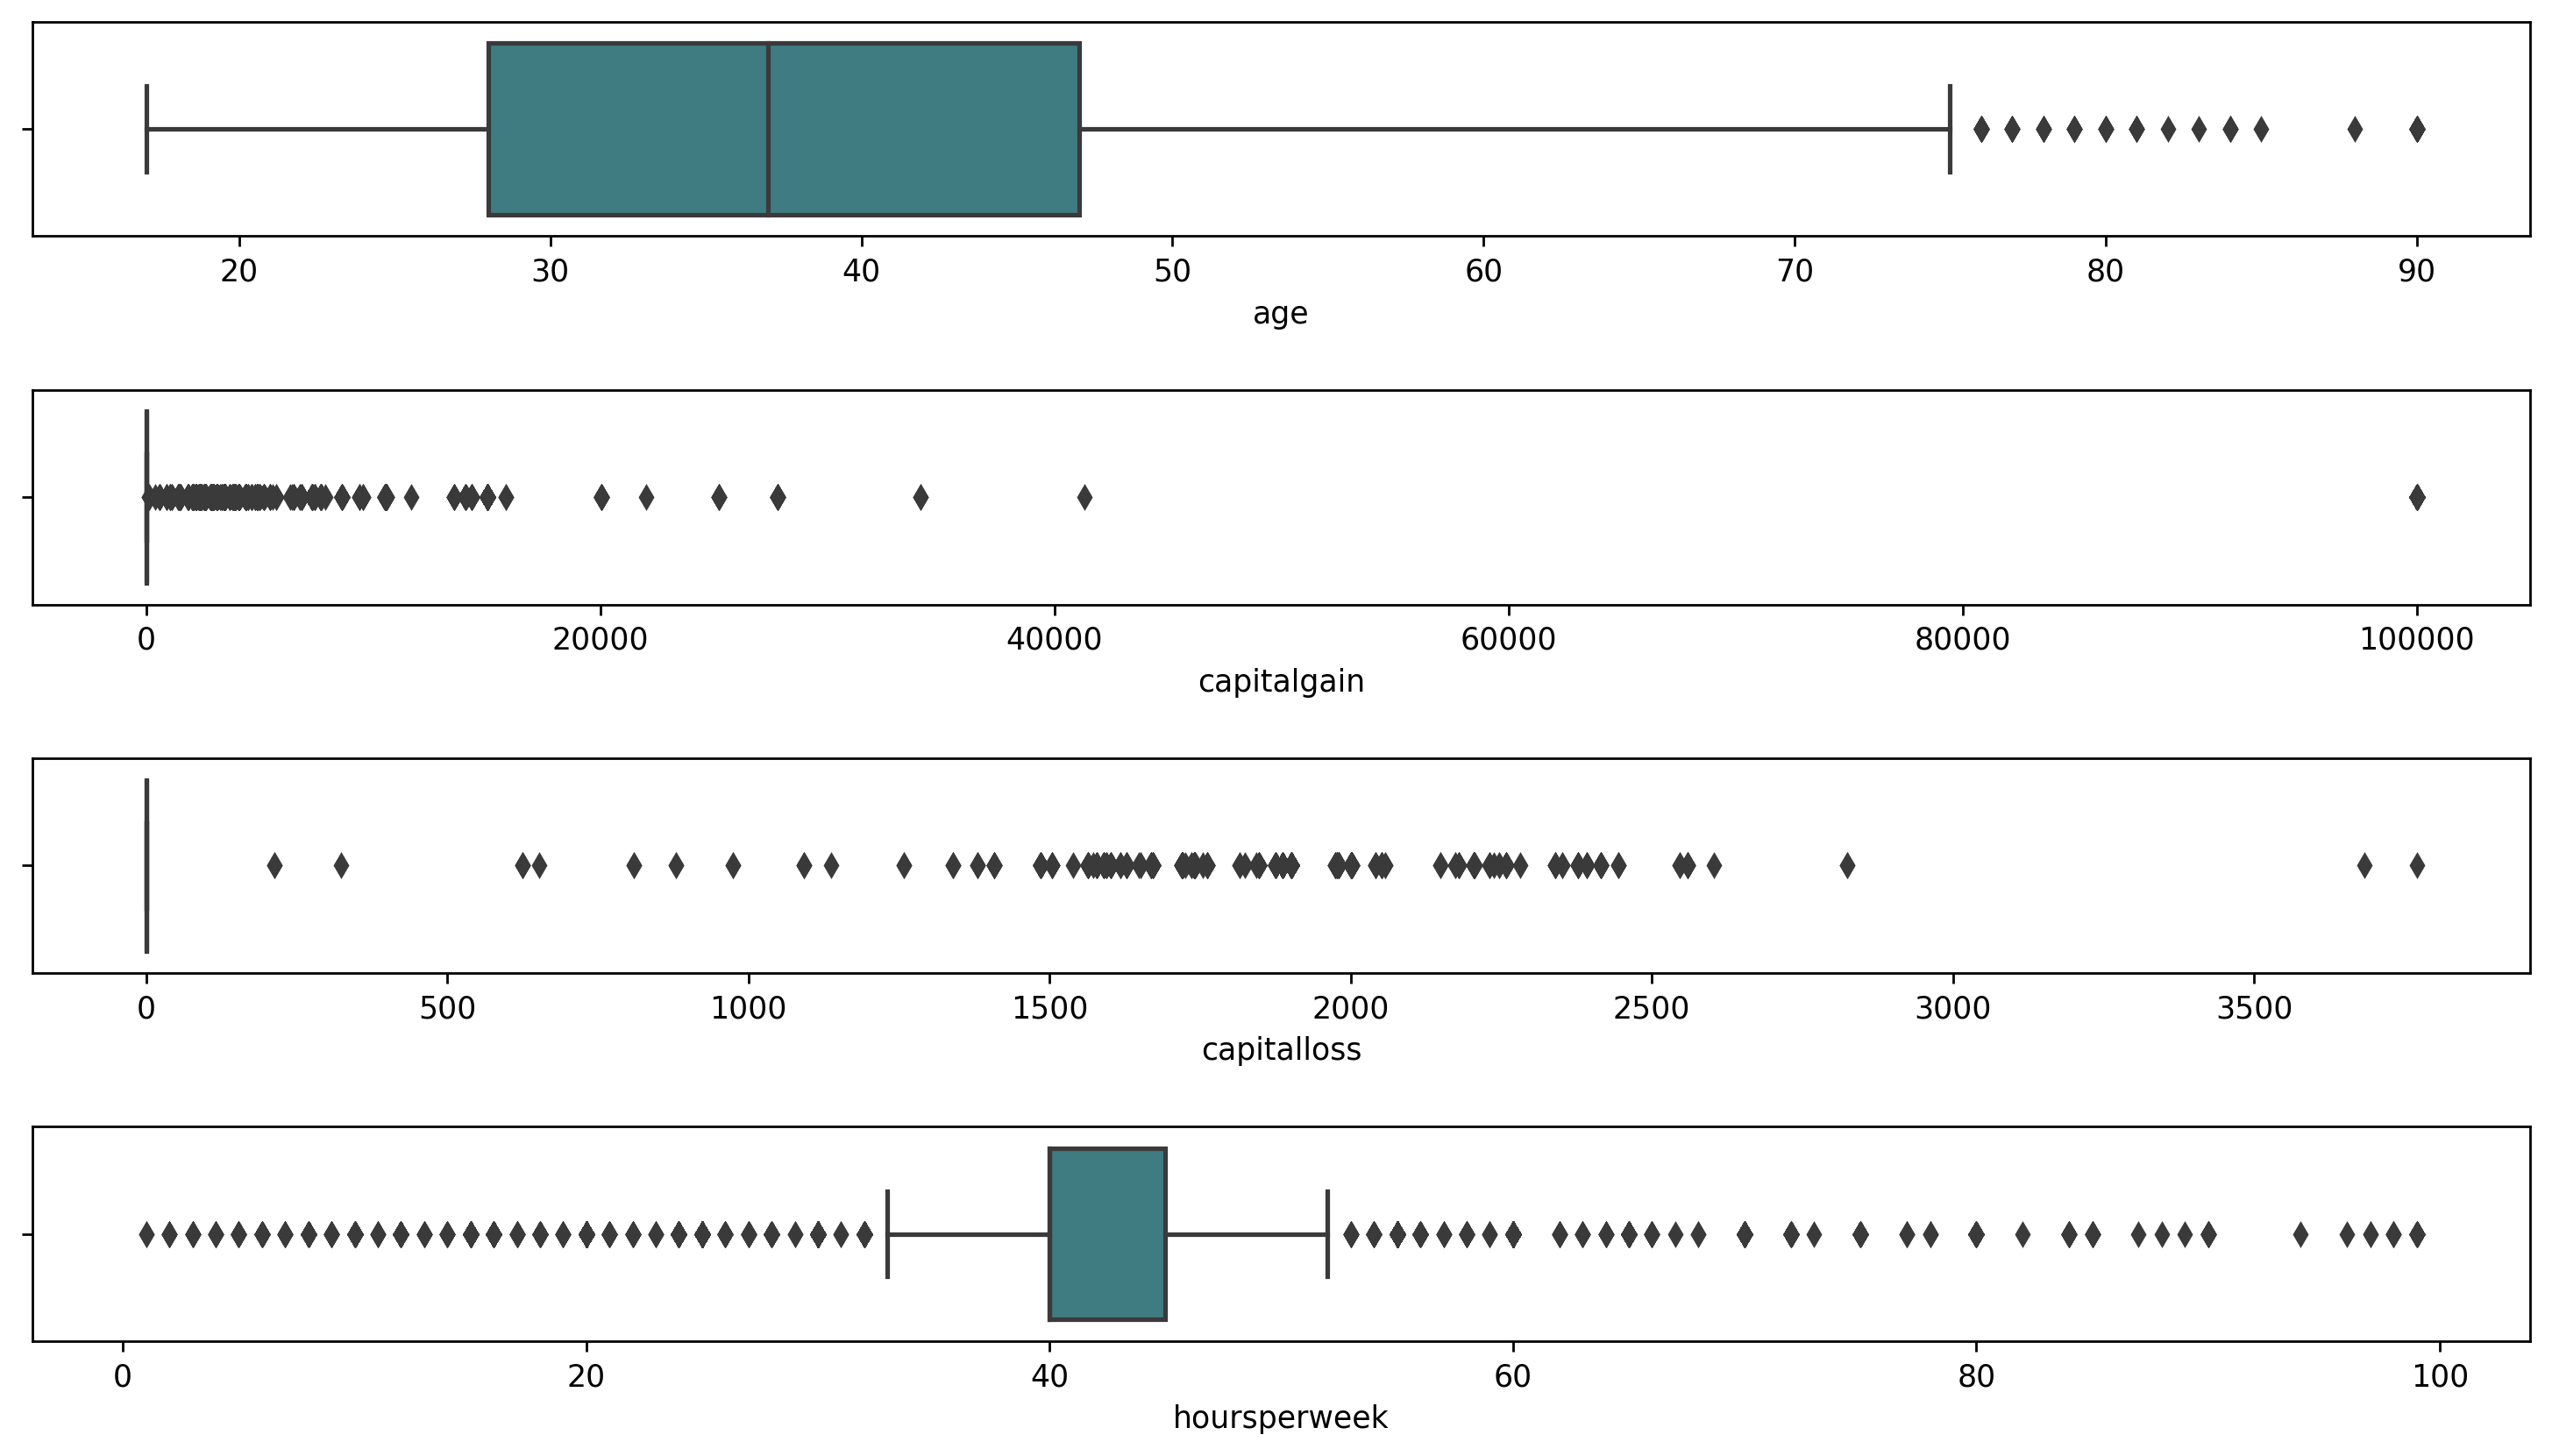

In [207]:
outlier1 = salary1.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

# Data Preprocessing

In [187]:
salary1['workclass']=salary1['workclass'].astype('category')
salary1['education']=salary1['education'].astype('category')
salary1['maritalstatus']=salary1['maritalstatus'].astype('category')
salary1['occupation']=salary1['occupation'].astype('category')
salary1['relationship']=salary1['relationship'].astype('category')
salary1['race']=salary1['race'].astype('category')
salary1['native']=salary1['native'].astype('category')
salary1['sex']=salary1['sex'].astype('category')

In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary1['Salary'] = le.fit_transform(salary1['Salary'])

In [190]:
salary1['Salary'] = le.fit_transform(salary1['Salary'])

In [191]:
salary1.Salary

0        0
1        0
2        0
3        0
4        0
        ..
11935    0
11936    1
11937    0
11938    0
11939    2
Name: Salary, Length: 11940, dtype: int64

In [192]:
salary1['workclass'] = le.fit_transform(salary1['workclass'])
salary1['education'] = le.fit_transform(salary1['education'])
salary1['maritalstatus'] = le.fit_transform(salary1['maritalstatus'])
salary1['occupation'] = le.fit_transform(salary1['occupation'])
salary1['relationship'] = le.fit_transform(salary1['relationship'])
salary1['race'] = le.fit_transform(salary1['race'])
salary1['sex'] = le.fit_transform(salary1['sex'])
salary1['native'] = le.fit_transform(salary1['native'])

In [193]:
salary1

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
11935   38          2         15           10              4           0   
11936   48          2         11            9              2           7   
11937   33          2         11            9              2           3   
11938   30          2         11            9              4           7   
11939   25          5          9           13              4           9   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
11935             3     4    0            0            0            40   
11936             0     4    1            0            0            40   
11937             0     4    1         4386            0            60   
11938             1     4    1            0            0            40   
11939             1     4    0            0            0            50   

       native  Salary  
0          38       0  
1          38       0  
2          38       0  
3          38       0  
4           4       0  
...       ...     ...  
11935      38       0  
11936      24       1  
11937      38       0  
11938      19       0  
11939      37       2  

[11940 rows x 14 columns]

In [194]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
11935    0
11936    1
11937    0
11938    0
11939    2
Name: Salary, Length: 11940, dtype: int64

In [195]:
salary1.Salary.unique()

array([0, 1, 2], dtype=int64)

In [196]:
salary1.Salary.value_counts()

0    8993
1    2946
2       1
Name: Salary, dtype: int64

In [197]:
salary2.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [200]:
salary2['workclass']=salary2['workclass'].astype('category')
salary2['education']=salary2['education'].astype('category')
salary2['maritalstatus']=salary2['maritalstatus'].astype('category')
salary2['occupation']=salary2['occupation'].astype('category')
salary2['relationship']=salary2['relationship'].astype('category')
salary2['race']=salary2['race'].astype('category')
salary2['native']=salary2['native'].astype('category')
salary2['sex']=salary2['sex'].astype('category')

In [201]:
salary2.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [202]:
salary2['Salary'] = le.fit_transform(salary2['Salary'])

In [203]:
salary2.Salary

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [204]:
#we also need to convert categories into numbers
salary2['workclass'] = le.fit_transform(salary2['workclass'])
salary2['education'] = le.fit_transform(salary2['education'])
salary2['maritalstatus'] = le.fit_transform(salary2['maritalstatus'])
salary2['occupation'] = le.fit_transform(salary2['occupation'])
salary2['relationship'] = le.fit_transform(salary2['relationship'])
salary2['race'] = le.fit_transform(salary2['race'])
salary2['sex'] = le.fit_transform(salary2['sex'])
salary2['native'] = le.fit_transform(salary2['native'])

In [205]:
salary2

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

# Splitting the Data

In [117]:
X_train = salary1.drop(['Salary'], axis=1)
y_train = salary1['Salary']

In [130]:
X_test = salary2.drop(['Salary'], axis=1)
y_test = salary2['Salary']

In [131]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

# Model Building

In [133]:
svmm=SVC()
svmm.fit(X_train,y_train)

SVC()

In [134]:
svmm.score(X_train,y_train)

0.797571189279732

In [135]:
svmm.score(X_test,y_test)

0.796281540504648